# Chains in LangChain

## Outline

* LLMChain
* Sequential Chains
  * SimpleSequentialChain
  * SequentialChain
* Router Chain

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

In [5]:
import pandas as pd
df = pd.read_csv('Restaurant_reviews.csv')

In [6]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


## LLMChain

In [7]:
from langchain.chat_models.gigachat import GigaChat
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

In [8]:
AUTH_DATA = os.environ['GIGACHAT_API_KEY']

llm = GigaChat(temperature=0.5, verify_ssl_certs=False, credentials=AUTH_DATA, scope='GIGACHAT_API_PERS')

In [15]:
prompt = ChatPromptTemplate.from_template(
    "Какое блюдо больше всего подходит ресторану {restaurant} и почему?"
)

Создадим простейший объект *chain* класса ***LLMChain***, реализующий интерфейс запросов к модели.

In [16]:
chain = LLMChain(llm=llm, prompt=prompt)

In [17]:
restaurant = "Beyond Flavours"
chain.run(restaurant)

'Ресторан Beyond Flavours специализируется на азиатской кухне, поэтому наиболее подходящим блюдом для него будет утка по-пекински. Это традиционное китайское блюдо, которое пользуется большой популярностью во всем мире благодаря своему уникальному вкусу и презентации. Утка по-пекински подается с соусом хойсин, кунжутным маслом и рисовой лапшой, что делает ее идеальным выбором для ресторана Beyond Flavours.'

## SimpleSequentialChain

Объект данного класса представляет собой интерфейс запросов к модели один за одним. То есть, мы передаём в цепочку несколько шаблонов запросов с одной переменной. Затем передаём переменную для первого запроса, а далее модель сама вычленяет необходимую переменную из предыдущего запроса для следующего.

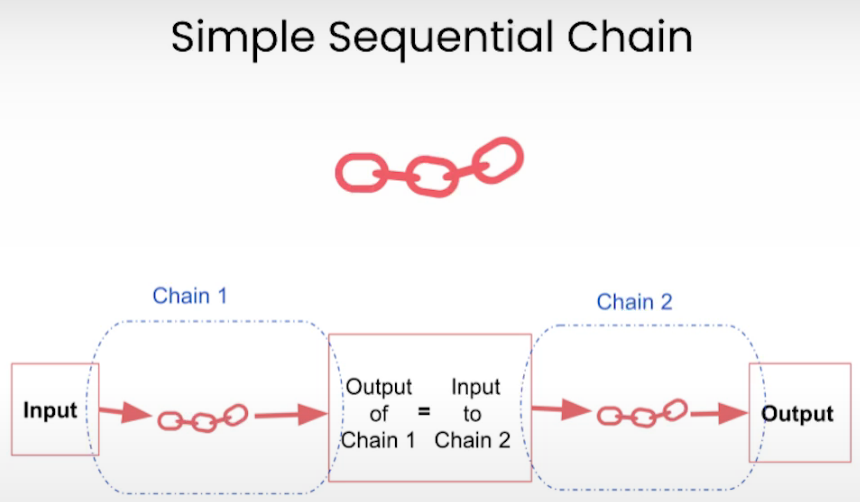

In [18]:
from langchain.chains import SimpleSequentialChain

In [19]:
# prompt template 1
first_prompt = ChatPromptTemplate.from_template(
    "Какое блюдо больше всего подходит ресторану {restaurant} и почему?"
)

# Chain 1
chain_one = LLMChain(llm=llm, prompt=first_prompt)

In [20]:
# prompt template 2
second_prompt = ChatPromptTemplate.from_template(
    "Напиши рецепт блюда: {dish}"
)
# chain 2
chain_two = LLMChain(llm=llm, prompt=second_prompt)

In [21]:
overall_simple_chain = SimpleSequentialChain(chains=[chain_one, chain_two],
                                             verbose=True
                                            )

In [24]:
overall_simple_chain.run(restaurant)



> Entering new SimpleSequentialChain chain...
Ресторан Beyond Flavours специализируется на азиатской кухне, поэтому наиболее подходящим блюдом для него будет суши. Это традиционное японское блюдо, которое пользуется популярностью во всем мире. Суши представляют собой рис с различными начинками, завернутый в лист нори (морские водоросли). В зависимости от начинки, суши могут быть рыбными, мясными, овощными или даже десертными. Кроме того, суши являются здоровым и питательным блюдом, что соответствует концепции ресторана Beyond Flavours, который стремится предлагать своим гостям качественную и полезную еду.
Ингредиенты:

1. Рис для суши
2. Листы нори (морские водоросли)
3. Филе лосося или другой рыбы по вашему выбору
4. Авокадо
5. Огурец
6. Васаби (японский хрен)
7. Соевый соус
8. Имбирь маринованный
9. Рисовый уксус
10. Сахар
11. Соль

Инструкции по приготовлению:

1. Приготовьте рис для суши согласно инструкции на упаковке.
2. Разрежьте филе лосося на тонкие полоски.
3. Очистите авок

'Ингредиенты:\n\n1. Рис для суши\n2. Листы нори (морские водоросли)\n3. Филе лосося или другой рыбы по вашему выбору\n4. Авокадо\n5. Огурец\n6. Васаби (японский хрен)\n7. Соевый соус\n8. Имбирь маринованный\n9. Рисовый уксус\n10. Сахар\n11. Соль\n\nИнструкции по приготовлению:\n\n1. Приготовьте рис для суши согласно инструкции на упаковке.\n2. Разрежьте филе лосося на тонкие полоски.\n3. Очистите авокадо и огурец, затем нарежьте их тонкими ломтиками.\n4. Разогрейте рисовый уксус в маленькой кастрюле, добавьте сахар и соль, перемешайте до полного растворения.\n5. Положите лист нори на бамбуковый коврик, сверху распределите рис, оставив свободным край около 1 см.\n6. Выложите на рис полоски лосося, авокадо и огурца.\n7. Сверните суши в рулет, помогая себе бамбуковым ковриком.\n8. Разрежьте рулет на порционные кусочки.\n9. Подавайте суши с васаби, соевым соусом и маринованным имбирем.\n\nПриятного аппетита!'

In [25]:
restaurant = 'Коммуналка'

overall_simple_chain.run(restaurant)



> Entering new SimpleSequentialChain chain...
Ресторан "Коммуналка" специализируется на традиционной русской кухне. Поэтому наиболее подходящим блюдом для этого заведения будет, например, борщ. Это одно из самых популярных русских блюд, которое представляет собой густой суп на основе свеклы с добавлением мяса, картофеля, моркови, лука и других овощей. Борщ может быть подан как горячее блюдо или как холодный суп (окрошка).
Ингредиенты для приготовления борща:

- 500 г говядины;
- 2 средние свеклы;
- 3 картофелины;
- 1 морковь;
- 1 луковица;
- 1 ст. л. томатной пасты;
- 1 ч. л. сахара;
- лавровый лист;
- соль, перец по вкусу;
- сметана для подачи.

Приготовление:

1. Мясо промыть, залить водой и поставить вариться до готовности.

2. Пока мясо варится, подготовить овощи: свеклу очистить и натереть на крупной терке, морковь нарезать тонкой соломкой, лук мелко нашинковать.

3. В сковороде разогреть немного растительного масла, добавить лук и обжарить его до золотистого цвета. Затем добави

'Ингредиенты для приготовления борща:\n\n- 500 г говядины;\n- 2 средние свеклы;\n- 3 картофелины;\n- 1 морковь;\n- 1 луковица;\n- 1 ст. л. томатной пасты;\n- 1 ч. л. сахара;\n- лавровый лист;\n- соль, перец по вкусу;\n- сметана для подачи.\n\nПриготовление:\n\n1. Мясо промыть, залить водой и поставить вариться до готовности.\n\n2. Пока мясо варится, подготовить овощи: свеклу очистить и натереть на крупной терке, морковь нарезать тонкой соломкой, лук мелко нашинковать.\n\n3. В сковороде разогреть немного растительного масла, добавить лук и обжарить его до золотистого цвета. Затем добавить морковь и жарить еще несколько минут.\n\n4. Добавить к овощам свеклу, томатную пасту, сахар и тушить все вместе около 10 минут.\n\n5. Картофель очистить и нарезать кубиками. Когда мясо будет готово, добавить картофель в кастрюлю и варить до готовности.\n\n6. Добавить в кастрюлю зажарку из овощей и специи, перемешать и варить еще 5-7 минут.\n\n7. Готовый борщ разлить по тарелкам, добавить сметану и пода

Проблема данного класса - отсутствие возможности использования переменных, которые были использованы раньше, чем последний запрос. Также главное ограничение SimpleSequentialChain - один вход, один выход.

## SequentialChain

Объект класса ***SequentialChain*** является более гибким и мощным инструментов и не имеет ранее перечисленных минусов.

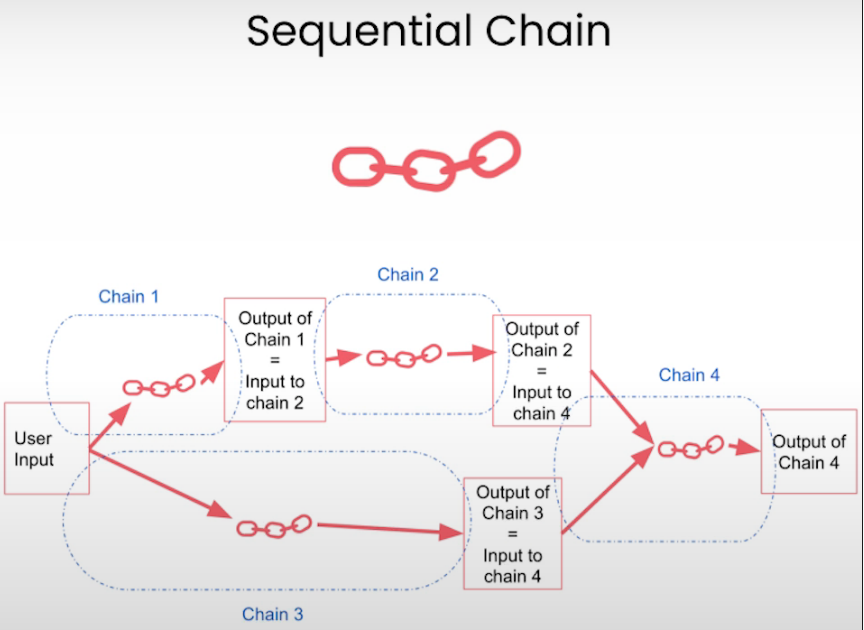

In [27]:
from langchain.chains import SequentialChain

In [28]:
# prompt template 1: translate to english
first_prompt = ChatPromptTemplate.from_template(
    "Переведи следующий отзыв на русский язык:"
    "\n\n{Review}"
)
# chain 1: input= Review and output= Russian_Review
chain_one = LLMChain(llm=llm, prompt=first_prompt, 
                     output_key="Russian_Review"
                    )


In [29]:
second_prompt = ChatPromptTemplate.from_template(
    "Можешь ли ты суммаризировать этот отзыв и сделать аннотацию:"
    "\n\n{Russian_Review}"
)
# chain 2: input= English_Review and output= summary
chain_two = LLMChain(llm=llm, prompt=second_prompt, 
                     output_key="summary"
                    )


In [30]:
# prompt template 3: translate to english
third_prompt = ChatPromptTemplate.from_template(
    "На каком языке написан этот отзыв:\n\n{Review}"
)
# chain 3: input= Review and output= language
chain_three = LLMChain(llm=llm, prompt=third_prompt,
                       output_key="language"
                      )


In [31]:

# prompt template 4: follow up message
fourth_prompt = ChatPromptTemplate.from_template(
    "Напиши ответ на данную аннотацию на выбранном языке:"
    "\n\nSummary: {summary}\n\nLanguage: {language}"
)
# chain 4: input= summary, language and output= followup_message
chain_four = LLMChain(llm=llm, prompt=fourth_prompt,
                      output_key="followup_message"
                     )


In [33]:
# overall_chain: input= Review 
# and output= Russian_Review,summary, followup_message
overall_chain = SequentialChain(
    chains=[chain_one, chain_two, chain_three, chain_four],
    input_variables=["Review"],
    output_variables=["Russian_Review", "summary","followup_message"],
    verbose=True
)

In [34]:
review = df.Review[5]
overall_chain(review)



> Entering new SequentialChain chain...

> Finished chain.


{'Review': 'Ambiance is good, service is good, food is aPradeecp and subro best service\nFood is good. Papiya good hostess and ur caption very good. This is 4star restaurant.',
 'Russian_Review': 'Атмосфера хорошая, обслуживание хорошее, еда очень вкусная и лучшая. Папия - отличная хозяйка, а подпись очень хорошая. Это ресторан на 4 звезды.',
 'summary': 'Отзыв положительный. Атмосфера, обслуживание и еда оценены как хорошие. Папия - отличная хозяйка, а подпись - хорошая. Ресторан заслуживает 4 звезды.',
 'followup_message': 'Summary: The review is positive. The atmosphere, service and food are all rated as good. Papia is a great hostess, and the signature is excellent. The restaurant deserves 4 stars.'}

## Router Chain

Класс ***Router Chain*** предполагает подбор одной из нескольких различных настроек, которые зависят от контекста поданного промпта.

В следующем примере создаём 4 шаблона под различные предметные области: физика, математика, история и компьютерные науки. В зависимости от области знаний поданного вопроса, будет выбран шаблон в котором будет задана информация о личности, которую будет представлять ИИ. И в шаблон будет подставлен промпт.

Если промпт не 

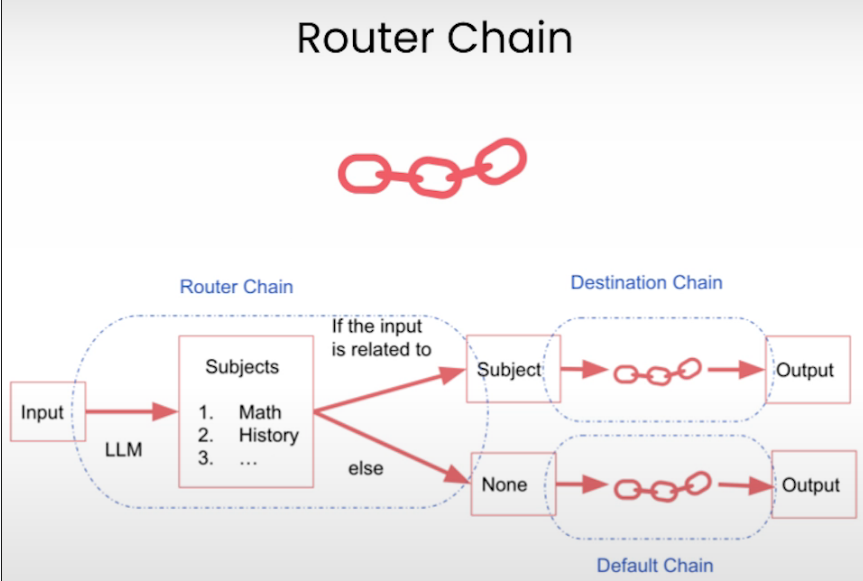

In [35]:
physics_template = """Вы очень умный профессор физики. \
У вас отлично получается отвечать на вопросы по физике кратко
и доступно для понимания. \
Когда вы не знаете ответа на вопрос, вы признаете,
что не знаете.

Вот вопрос:
{input}"""


math_template = """Вы очень хороший математик. \
У вас отлично получается отвечать на математические вопросы. \
Вы так хороши, потому что умеете разбивать
сложные проблемы на составные части,
отвечать на составные части, а затем соединять их вместе,
чтобы ответить на более широкий вопрос.

Вот вопрос:
{input}"""

history_template = """Вы очень хороший историк. \
Вы обладаете прекрасными знаниями и пониманием людей,
событий и контекстов из разных исторических периодов. \
У вас есть способность мыслить, размышлять, дискутировать, обсуждать и
оценивать прошлое. Вы уважаете исторические свидетельства
и умеете использовать их для обоснования своих объяснений
и суждений.

Вот вопрос:
{input}"""


computerscience_template = """ Вы успешный специалист в области компьютерных наук.\
У вас есть страсть к творчеству, сотрудничеству,\
дальновидность, уверенность в себе, способность решать проблемы,
понимание теорий и алгоритмов и отличные коммуникативные
навыки. Вы отлично отвечаете на вопросы по программированию. \
Вы так хороши, потому что знаете, как решить проблему,
описав решение в виде обязательных шагов,
которые машина может легко интерпретировать, и вы знаете, как
выбрать решение, которое обеспечивает хороший баланс между
временной и пространственной сложностью. 

Вот вопрос:
{input}"""

In [36]:
prompt_infos = [
    {
        "name": "physics", 
        "description": "Подходит для ответов по физике", 
        "prompt_template": physics_template
    },
    {
        "name": "math", 
        "description": "Подходит для ответов по математике", 
        "prompt_template": math_template
    },
    {
        "name": "History", 
        "description": "Подходит для ответов по истории", 
        "prompt_template": history_template
    },
    {
        "name": "computer science", 
        "description": "Подходит для ответов по компьютерным наукам", 
        "prompt_template": computerscience_template
    }
]

In [37]:
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain,RouterOutputParser
from langchain.prompts import PromptTemplate

In [38]:
destination_chains = {}
for p_info in prompt_infos:
    name = p_info["name"]
    prompt_template = p_info["prompt_template"]
    prompt = ChatPromptTemplate.from_template(template=prompt_template)
    chain = LLMChain(llm=llm, prompt=prompt)
    destination_chains[name] = chain  
    
destinations = [f"{p['name']}: {p['description']}" for p in prompt_infos]
destinations_str = "\n".join(destinations)

In [39]:
default_prompt = ChatPromptTemplate.from_template("{input}")
default_chain = LLMChain(llm=llm, prompt=default_prompt)

In [101]:
MULTI_PROMPT_ROUTER_TEMPLATE = """При вводе необработанного текста
в языковую модель выберите подсказку модели, наиболее подходящую для ввода. \
Вам будут даны названия доступных подсказок и
описание того, для чего они лучше всего подходят. \
Вы также можете пересмотреть исходные данные, если считаете, что пересмотр\
в конечном счете это приведет к лучшему реагированию языковой модели.

<< ФОРМАТИРОВАНИЕ >>
Возвращает фрагмент кода markdown с объектом JSON, отформатированным так, чтобы он выглядел как:
``json
{{{{
    "destination": строка \ название используемого запроса или "ПО УМОЛЧАНИЮ".
    "next_inputs": строка \ потенциально измененная версия исходного ввода
}}}}
```

ПОМНИТЕ: "destination" ДОЛЖЕН содержать одим из возможных вариантов, указанных в << ТЕМАТИКИ >> \
, иначе "destination" запроса должен быть равен "ПО УМОЛЧАНИЮ".
ПОМНИТЕ: "next_inputs" может быть просто исходным вводом,
если вы не считаете, что какие-либо изменения необходимы.

<< ТЕМАТИКИ >>
{destinations}

<< ВВОД >>
{{input}}

<< ВЫВОД (не забудьте указать "`json)>>"""

In [102]:
router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(
    destinations=destinations_str
)
router_prompt = PromptTemplate(
    template=router_template,
    input_variables=["input"],
    output_parser=RouterOutputParser(),
)

router_chain = LLMRouterChain.from_llm(llm, router_prompt)

In [103]:
chain = MultiPromptChain(router_chain=router_chain, 
                         destination_chains=destination_chains, 
                         default_chain=default_chain, verbose=True
                        )

In [104]:
chain.run("Что такое излучение абсолютно черного тела?")



> Entering new MultiPromptChain chain...
physics: {'input': 'Что такое излучение абсолютно черного тела?'}
> Finished chain.


'Излучение абсолютно черного тела — это электромагнитное излучение, которое исходит от абсолютно чёрного тела при его нагревании.'

In [105]:
chain.run("Сколько будет 2 + 3")



> Entering new MultiPromptChain chain...
math: {'input': 'Сколько будет 2 плюс 3?'}
> Finished chain.


'Ответ: 5.'

In [106]:
chain.run("Почему все клетки нашего тела содержат ДНК?")



> Entering new MultiPromptChain chain...
biology: {'input': 'Почему все клетки нашего тела содержат ДНК?'}

ValueError: Received invalid destination chain name 'biology'

In [65]:
chain.run("На каком полушарии находится Россия?")



> Entering new MultiPromptChain chain...
geography: {'input': 'На каком полушарии находится Россия?'}

ValueError: Received invalid destination chain name 'geography'

Видим, что в последних двух запросах модель смогла понять общую логику нашего маршрутизатора, выделив области знаний на заданные вопросы - биология и география, но т.к. мы не задали никаких уточнений на счёт этих предметных областей, возникла ошибка.

P.S: по идее, модель должна выводить не biology и geography, а "по умолчанию" или "None", как это показано в ролике с моделью OpenAI, но в случае с GigaChat, модель наотрез отказывается писать "По умолчанию".